<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Daniel!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

In [1]:
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 47 kB/s eta 0:00:011


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os.path
from IPython.display import display, display_html
from IPython.display import Markdown as md

<a class="anchor" id="0_toc"></a>
# Table of Contents
***

1. [Open the data file and study the general information](#1_data_file)
2. [Data preprocessing](#2_data_pre)
    1. [Missing values](#2_data_pre-1_na)
    2. [Column names](#2_data_pre-2_names)
    3. [Data types](#2_data_pre-3_dtypes)
    4. [Categories](#2_data_pre-4_categories)
3. [Make calculations and add them to the table](#3_data_pre_b)
    1. [Dates](#3_data_pre_b-1_dates)
    2. [Vehicle age](#3_data_pre_b-2_age)
    3. [Vehicle averge mileage](#3_data_pre_b-3_mileage)
4. [Carry out exploratory data analysis](#4_eda)
    1. [Histograms](#4_eda-1_hist)
    2. [Outliers](#4_eda-2_box)
    3. [Compare histograms](#4_eda-3_comp)
    4. [Ad lifespan](#4_eda-4_ad)
    5. [Ads by vehicle type](#4_eda-5_vehicle)
    6. [Price correlation](#4_eda-6_price)
5. [Overall conclusion](#5_conclusions)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
You managed to create a great content plan, good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>

Ana, it is great that you started your project with the short introduction. I would like to recommend you to add the content plan of the main steps of your analysis at the beginning of the project and fix the main aim of the project that it is better to formulate by yourself!

<a class="anchor" id="1_data_file"></a>
## Open the data file and study the general information. 
***
[back to Table of Contents](#0_toc)

In [3]:
filename = 'vehicles_us.csv'
filepath = f'/datasets/{filename}'
if not os.path.isfile(filepath):
    filepath = filename

In [4]:
try:
    !du -m "$filepath"      # filesize in MiB
    !stat -l "$filepath"    # date, filename
    !file "$filepath"       # file type, encoding
    !wc -l "$filepath"      # line count
    !head -n6 "$filepath"   # file preview
except Exception as e:
    print(e)

5	/datasets/vehicles_us.csv
stat: invalid option -- 'l'
Try 'stat --help' for more information.
/bin/bash: file: command not found
51526 /datasets/vehicles_us.csv
price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,,1.0,2018-06-23,19
25500,,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,,2019-02-07,79
1500,2003.0,ford f-150,fair,8,gas,,automatic,pickup,,,2019-03-22,9
14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,,2019-04-02,28


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Daniel, it is really great that you used the os module to download the data, and a big plus for `try-except` too.

#### The dataset contains the following fields:
1. price
2. model_year
3. model
4. condition
5. cylinders
6. fuel — gas, diesel, etc.
7. odometer — the vehicle's mileage when the ad was published
8. transmission
9. type
10. paint_color
11. is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
12. date_posted — the date the ad was published
13. days_listed — from publication to removal

In [5]:
df = pd.read_csv(filepath)
pd.options.display.max_columns = len(df.columns)

In [6]:
display(df.head())
df.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


File loaded successfully.

In [7]:
df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

In [8]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [10]:
df.loc[df['type'] == 'other', 'model']

488            toyota camry
517             ford fusion
588           ford explorer
660           jeep wrangler
668      chevrolet colorado
                ...        
50465       hyundai elantra
50468           ford escape
50813          chrysler 300
51049         nissan maxima
51486      hyundai santa fe
Name: model, Length: 256, dtype: object

**All vehicles appear to be 4 wheels, land vehicles.**

### Conclusion

__Quantitative variables:__
* price
* model_year
* odometer
* days_posted
* days_listed

__Categorical variables:__
* model
* condition
* cylinders
* fuel
* transmission
* type
* paint_color
* is_4wd

__possible issues:__
- price: outliers (1, 375000)
- model_year: outlier (1908), missing values
- cylinders: missing values
- odometer: outliers (0, 990000), missing values
- is_4wd: single value (1), missing values (0?)
- days_listed: outliers (0, 271)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, everything is alright! You have successfully identified the main problems in the data, explore the dataframe from different sides and in great detail, let's see what results you have got at the next stages of analysis!

<a class="anchor" id="2_data_pre"></a> 
## Data preprocessing
***
[back to Table of Contents](#0_toc)

<a class="anchor" id="2_data_pre-1_na"></a>
### Missing Values

In [11]:
def missing_values_ratio(column_name):
    """Prints column's missing values count and ratio"""
    
    total_rows = df.shape[0]
    na_count = df[column_name].isna().sum()
    na_ratio = na_count / total_rows
    
    display(md(f"'{column_name}' missing values: {na_count} ({na_ratio:.2%})"))
    
# missing_values_ratio('model_year')

In [12]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Spotted 5 columns with missing values: <a class="anchor" id="na_map"></a>
* [model_year](#na_model_year)
* [cylinders](#na_cylinders)
* [odometer](#na_odometer)
* [paint_color](#na_paint_color)
* [is_4wd](#na_is_4wd)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is absolutely correct that you tried to check not only the amount of missing values per column, but also the ratio of missing values. You can also do it using these variants of code:
        
`data.isna().sum()*100/len(data)`
       
`data.isna().mean() * 100`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`
       
        
And it is better to use `isna()` not `isnul()` (as you did in your function), more information about it see at link below:
        
https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference#:~:text=isnull%20is%20an%20alias%20of%20isna%20in%20See%20also%20section.&text=Therefore%2C%20they%20must%20be%20the,NaN%2C%20np.

### model_year <a class="anchor" id="na_model_year">
[back to Missing Values](#na_map)

In [13]:
display(df[df['model_year'].isna()].head())
missing_values_ratio('model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


'model_year' missing values: 3619 (7.02%)

It is common knowledge that a vehicle's model year is a contributing factor to its market price,  
and is important to this analysis.  
Attempting to estimate by grouping by model, and then taking the year median per model.

In [14]:
models_missing_year = df.loc[df['model_year'].isna(), 'model']

display(
    models_missing_year,
    md(f'\# models: {models_missing_year.nunique()}'))

1                        ford f-150
20                  chevrolet tahoe
65                       ford f-150
69                       ford f-150
72                   subaru impreza
                    ...            
51464          ford f250 super duty
51465                     gmc yukon
51487                    ford f-150
51488    chevrolet silverado 3500hd
51508       chrysler town & country
Name: model, Length: 3619, dtype: object

\# models: 100

In [15]:
median_year_by_model = (
    df[['model_year', 'model']]
     .query("not model_year.isnull() and model in @models_missing_year")
     .groupby('model')
     .median())

display(
    median_year_by_model,
    md(f'\# models: {len(median_year_by_model.index)}'))

,model_year
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


\# models: 100

In [16]:
id_model_year_fill = models_missing_year.apply(lambda x:median_year_by_model.loc[x]).squeeze()
id_model_year_fill.isna().sum()

0

In [17]:
df['model_year'].fillna(id_model_year_fill, inplace=True)
df['model_year'].isna().sum()

0

'model_year' missing values have been filled.

### cylinders <a class="anchor" id="na_cylinders">
[back to Missing Values](#na_map)

'cylinders' count is a dependant on a vehicle's model.  
Can be estimated by grouping to model and model_year, and taking the mode (most frequent occurence) per group.

In [18]:
display(df[df['cylinders'].isna()].head())
missing_values_ratio('cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


'cylinders' missing values: 5260 (10.21%)

In [19]:
models_missing_cylinders = df.loc[df['cylinders'].isna(), ['model', 'model_year']]

display(
    models_missing_cylinders,
    md(f'\# models: {models_missing_cylinders.nunique()}'))

,model,model_year
9,honda pilot,2008.0
36,chrysler 300,2013.0
37,toyota tacoma,2005.0
59,toyota highlander,2006.0
63,ford mustang,1966.0
...,...,...
51429,toyota camry,2004.0
51442,ford f150,2018.0
51460,ford fusion,2007.0
51477,acura tl,2007.0


\# models: model         100
model_year     51
dtype: int64

In [20]:
models_missing_cylinders['model']

9              honda pilot
36            chrysler 300
37           toyota tacoma
59       toyota highlander
63            ford mustang
               ...        
51429         toyota camry
51442            ford f150
51460          ford fusion
51477             acura tl
51486     hyundai santa fe
Name: model, Length: 5260, dtype: object

In [21]:
models_list = models_missing_cylinders['model']
(df[['cylinders', 'model', 'model_year']]
                           .query('not cylinders.isnull() and model in @models_list')
                           .pivot_table(
                               index=['model', 'model_year'],
                               values='cylinders',
                               aggfunc=lambda x:x.mode()[0]))

cylinders
model             model_year           
acura tl          1999.0            6.0
                  2001.0            6.0
                  2002.0            6.0
                  2003.0            6.0
                  2004.0            6.0
...                                 ...
volkswagen passat 2014.0            4.0
                  2015.0            4.0
                  2016.0            4.0
                  2017.0            4.0
                  2018.0            4.0

[2204 rows x 1 columns]

In [22]:
models_list = models_missing_cylinders['model']
cylinders_by_year_model = (df[['cylinders', 'model', 'model_year']]
                           .query('not cylinders.isnull() and model in @models_list')
                           .pivot_table(
                               index=['model', 'model_year'],
                               values='cylinders',
                               aggfunc=lambda x:x.mode()[0]))
del models_list
cylinders_by_year_model.columns = ['cylinders']
cylinders_by_year_model

cylinders
model             model_year           
acura tl          1999.0            6.0
                  2001.0            6.0
                  2002.0            6.0
                  2003.0            6.0
                  2004.0            6.0
...                                 ...
volkswagen passat 2014.0            4.0
                  2015.0            4.0
                  2016.0            4.0
                  2017.0            4.0
                  2018.0            4.0

[2204 rows x 1 columns]

In [23]:
cylinders_by_year_model.value_counts()

cylinders
8.0          818
6.0          750
4.0          614
10.0          12
5.0           10
dtype: int64

In [24]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [25]:
def estimate_cylinders(row):
    """
    Returns count of cylidners per model, based on model + year.
    Falls back to the model's median of cylinders of all years.
    """
    # print(row['model'], row['model_year']) # debug
    
    try:
        return cylinders_by_year_model.loc[(row['model'], row['model_year']), 'cylinders']
    except:
        model = row['model']
        return cylinders_by_year_model.query("model == @model")['cylinders'].mode()[0]

In [26]:
models_missing_cylinders

,model,model_year
9,honda pilot,2008.0
36,chrysler 300,2013.0
37,toyota tacoma,2005.0
59,toyota highlander,2006.0
63,ford mustang,1966.0
...,...,...
51429,toyota camry,2004.0
51442,ford f150,2018.0
51460,ford fusion,2007.0
51477,acura tl,2007.0


In [27]:
id_cylinders_fill = models_missing_cylinders.apply(estimate_cylinders, axis=1)
id_cylinders_fill.isna().sum()

0

In [28]:
id_cylinders_fill.value_counts()

6.0     1808
8.0     1774
4.0     1635
5.0       22
10.0      21
dtype: int64

In [29]:
display(
    md('values distribution _before_:'),
    df['cylinders'].value_counts(normalize=True))

values distribution _before_:

8.0     0.342462
6.0     0.339349
4.0     0.299665
10.0    0.011866
5.0     0.005879
3.0     0.000735
12.0    0.000043
Name: cylinders, dtype: float64

In [30]:
df['cylinders'].fillna(id_cylinders_fill, inplace=True)
df['cylinders'].isna().sum()

0

In [31]:
display(
    md('values distribution _after_:'),
    df['cylinders'].value_counts(normalize=True))

values distribution _after_:

8.0     0.341931
6.0     0.339796
4.0     0.300805
10.0    0.011063
5.0     0.005706
3.0     0.000660
12.0    0.000039
Name: cylinders, dtype: float64

Distribution was practically undisturbed, filled missing values successfully.

### odometer <a class="anchor" id="na_odometer">
[back to Missing Values](#na_map)

'odometer' values represent the distance traveled,  
and is usually used by a potential buyer in order to estimate the "wear & tear" of the vehicle.  
Estimating missing values by group model_year and condition.

In [32]:
display(df[df['odometer'].isna()].head())
missing_values_ratio('odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


'odometer' missing values: 7892 (15.32%)

In [33]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [34]:
missing_odometer = df.loc[df['odometer'].isna(), ['condition', 'model_year']]
missing_odometer

,condition,model_year
3,fair,2003.0
15,excellent,2013.0
23,good,2004.0
24,excellent,2009.0
25,like new,2017.0
...,...,...
51498,excellent,2011.0
51507,good,2012.0
51516,good,2011.0
51519,excellent,2015.0


In [35]:
odometer_by_condition_year = (df[['odometer', 'condition', 'model_year']]
 .query('not odometer.isnull()')
 .pivot_table(
     index=['condition', 'model_year'],
     values='odometer',
 )
)
odometer_by_condition_year

odometer
condition model_year          
excellent 1936.0       30000.0
          1954.0        3565.0
          1955.0       47180.0
          1958.0        3184.0
          1960.0       16000.0
...                        ...
salvage   2015.0       40975.0
          2016.0       28000.0
          2017.0       37501.0
          2018.0       23810.5
          2019.0        9621.0

[271 rows x 1 columns]

In [36]:
def estimate_odometer(row):
    """
    Returns distance traveled based on condition + year.
    Falls back to the condition's mean of distance traveled for all years.
    """
    # print(row['model'], row['model_year']) # debug
    
    try:
        return odometer_by_condition_year.loc[(row['condition'], row['model_year']), 'odometer']
    except:
        condition = row['condition']
        return odometer_by_condition_year.query("condition == @condition")['odometer'].mean()

In [37]:
id_odometer_fill = missing_odometer.apply(estimate_odometer, axis=1)
id_odometer_fill.isna().sum()

0

In [38]:
id_odometer_fill.describe()

count      7892.000000
mean     115500.540880
std       40903.973443
min        3028.000000
25%       94088.469538
50%      120704.537305
75%      146379.177215
max      253480.000000
dtype: float64

In [39]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

The statistical distribution looks similar, confident filling in generated values.

In [40]:
df['odometer'].fillna(id_odometer_fill, inplace=True)
df['odometer'].isna().sum()

0

Missing values filled successfully.

### paint_color <a class="anchor" id="na_paint_color">
[back to Missing Values](#na_map)

In [41]:
display(df[df['paint_color'].isna()].head())
missing_values_ratio('paint_color')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.000000,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.000000,automatic,SUV,NaN,NaN,2018-08-22,8


'paint_color' missing values: 9267 (17.99%)

In [42]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [43]:
missing_paint_color = df.loc[df['paint_color'].isna(), ['model', 'model_year']]
missing_paint_color

,model,model_year
0,bmw x5,2011.0
3,ford f-150,2003.0
8,kia sorento,2012.0
12,ram 1500,2012.0
21,toyota rav4,2007.0
...,...,...
51502,chevrolet equinox,2011.0
51503,chevrolet malibu,2011.0
51506,ford f150 supercrew cab xlt,2017.0
51519,honda accord,2015.0


In [44]:
color_by_year_model = (
    df[['model', 'model_year', 'paint_color']]
     .query('not paint_color.isnull()')
     .groupby(['model', 'model_year'])
    ).apply(lambda x:x['paint_color'].value_counts()).to_frame()
color_by_year_model.columns = ['paint_color']
color_by_year_model

paint_color
model             model_year                    
acura tl          1999.0     grey              1
                             blue              1
                             black             1
                  2001.0     silver            2
                             black             2
...                                          ...
volkswagen passat 2016.0     blue              1
                  2017.0     white             2
                             grey              1
                             blue              1
                             black             1

[10245 rows x 1 columns]

There is not a single clear choice for a color of a specific model and year,  
filling in NaN values with a generic 'unknown' label.

In [45]:
df['paint_color'].fillna('unknown', inplace=True)
df['paint_color'].isna().sum()

0

### is_4wd <a class="anchor" id="na_is_4wd">
[back to Missing Values](#na_map)

In [46]:
display(df[df['is_4wd'].isna()].head())
missing_values_ratio('is_4wd')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.000000,automatic,sedan,grey,NaN,2019-03-28,29


'is_4wd' missing values: 25953 (50.37%)

In [47]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

It looks like there is only a single value for 'is_4wd':  1 (True).  
NaN values should probably be 0 instead (complimentary of boolean type),  
appears to be a technical error which should be filled as a Bug Report to the Technical team's responsible party (i.e. data engineers, etc..).

In [48]:
df['is_4wd'].fillna(0, inplace=True)
df['is_4wd'].isna().sum()

0

#### Missing values conclusion

In [49]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

All missing values have been filled, ready to continue.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 

Daniel, ok, I agree with your strategy of dealing with missing values in the data.
        
        
Some thoughts about the possinble strategies of filling in missing values. 
        
Columns you have tried to preprocess have numeric data, so we can study their correlation with the categorical variables from the dataset.

It would be reasonable to assume that the mileage and price correlate with the condition of the vehicle, and the number of cylinders and year with its model. And we can replace missing values with the medians, grouping the data by these parameters.
    
One more way is to build the correlation matrix, check what factors are correlated and fill in the missing values based on correlation and grouping methods.
    
Filling in missing values with simply a median or mean by a column is a rather risky strategy and is only acceptable for cases where no more than 10% of the data is missing in our dataframe. The risk is that such an approach can lead to distortion of the initial data and, as a result, we will get a biased estimate based on the analysis results.
    
Remember, that it is important not only to fill in the missing values using some method, but also to give arguments why this particular method in this particular case is adequate and correct. And it is better to connect the strategy you choose for filling in missing values with the hypotheses about why there are missing values in the data, why they occur.

      

<a class="anchor" id="2_data_pre-2_names"></a>
### Column Names
[back to Table of Contents](#0_toc)

In [50]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [51]:
df.rename(columns={'odometer': 'mileage', 'paint_color': 'color'}, inplace=True)

Renamed 'odometer' to 'mileage', and 'paint_color' to 'color'.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, here everything is alright!

<a class="anchor" id="2_data_pre-3_dtypes"></a>
### Data Types
[back to Table of Contents](#0_toc)

In [52]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
mileage         float64
transmission     object
type             object
color            object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Some columns' data types should be changed:
- model_year - int64
- cylinders - int64
- mileage - int64
- is_4wd - bool
- date_posted - datetime64

float to int conversion is suggested because relevant columns' information does not need the precision of float (memory and cpu efficiency),  
boolean is because 'is_4wd' is in fact boolean, as noted in the previous section (semantics),  
and datetime for better semantics, processing efficiency, and date-time related functions.

In [53]:
df['model_year'] = df['model_year'].astype('int')

In [54]:
df['cylinders'] = df['cylinders'].astype('int')

In [55]:
df['mileage'] = df['mileage'].astype('int')

In [56]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [57]:
df['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [58]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [59]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
mileage                  int64
transmission            object
type                    object
color                   object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Data types have been converted successfully.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Daniel, absolutely agree with your decision here!

<a class="anchor" id="2_data_pre-4_categories"></a>
### Categories
[back to Table of Contents](#0_toc)

Columns to categorize:
- model
- condition
- fuel
- transmission
- type
- color

In [60]:
def categorize(column_name, ref=None):
    """
    Replaces, in-place, relevant column with a corresponding column of ids.
    
    Returns a Tuple:
      Series: (index) id, values
      Series: (index) values, id
    """
    
    if not isinstance(ref, pd.Series):
        ref = df[column_name].value_counts().sort_index().reset_index()['index']
        
    ref_inverse = pd.Series(data=ref.index, index=ref.values)
    
    df[f'{column_name}_id'] = df[column_name].apply(lambda x:ref_inverse[x])
    df.drop(column_name, axis=1, inplace=True)
    
    return ref, ref_inverse

In [61]:
df.select_dtypes('object')

,model,condition,fuel,transmission,type,color
0,bmw x5,good,gas,automatic,SUV,unknown
1,ford f-150,good,gas,automatic,pickup,white
2,hyundai sonata,like new,gas,automatic,sedan,red
3,ford f-150,fair,gas,automatic,pickup,unknown
4,chrysler 200,excellent,gas,automatic,sedan,black
...,...,...,...,...,...,...
51520,nissan maxima,like new,gas,automatic,sedan,black
51521,honda civic,salvage,gas,automatic,sedan,white
51522,hyundai sonata,excellent,gas,automatic,sedan,blue
51523,toyota corolla,good,gas,automatic,sedan,black


In [62]:
df.select_dtypes('object').nunique()

model           100
condition         6
fuel              5
transmission      3
type             13
color            13
dtype: int64

In [63]:
model_ref, _ = categorize('model')

In [64]:
fuel_ref, _ = categorize('fuel')

In [65]:
transmission_ref, _ = categorize('transmission')

In [66]:
model_type_ref, _ = categorize('type')

In [67]:
color_ref, _ = categorize('color')

In [68]:
condition_ref, _ = categorize(
    column_name='condition',
    ref=pd.Series({
        0: 'salvage',
        1: 'fair',
        2: 'good',
        3: 'excellent',
        4: 'like new',
        5: 'new'
    }))

In [69]:
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,color_id,condition_id,cylinders,date_posted,days_listed,fuel_id,is_4wd,mileage,model_id,model_year,price,transmission_id,type_id
0,10,2,6,2018-06-23,19,2,True,145000,1,2011,9400,0,0
1,11,2,6,2018-10-19,50,2,True,88705,32,2011,25500,0,8
2,8,4,4,2019-02-07,79,2,False,110000,64,2013,5500,0,9
3,10,1,8,2019-03-22,9,2,False,202621,32,2003,1500,0,8
4,0,3,4,2019-04-02,28,2,False,80903,21,2017,14900,0,9


Data has been cleaned, transformed to appropriate data types, categorized and extracted to lookup tables,  
and is now ready to be inspected by mathematical methods.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is great that you used a range of Python methods, you are doing great!

<a class="anchor" id="3_data_pre_b"></a>
## Make calculations and add them to the table
***
[back to Table of Contents](#0_toc)

<a class="anchor" id="data_pre_2"></a>
- [dates](#3_data_pre_b-1_dates): Day of the week, month, and year the ad was placed
- [vehicle's age](#3_data_pre_b-2_age) (in years) when the ad was placed
- [vehicle's average mileage](#3_data_pre_b-3_mileage) per year

All vehicle data columns will stay in 'df' dataframe,  
and all 'ad' related columns will extracted to a new dataframe called 'ad_ref'.

<a class="anchor" id="3_data_pre_b-1_dates"></a>
__Dates__<br />
[up](#3_data_pre_b)

In [70]:
ad_ref = pd.concat([
    df['date_posted'],
    df['days_listed'],
    df['date_posted'].dt.day_of_week,
    df['date_posted'].dt.month,
    df['date_posted'].dt.year
], keys=['date_posted', 'days_listed', 'day_of_week', 'month', 'year'], axis=1)
ad_ref

,date_posted,days_listed,day_of_week,month,year
0,2018-06-23,19,5,6,2018
1,2018-10-19,50,4,10,2018
2,2019-02-07,79,3,2,2019
3,2019-03-22,9,4,3,2019
4,2019-04-02,28,1,4,2019
...,...,...,...,...,...
51520,2018-10-03,37,2,10,2018
51521,2018-11-14,22,2,11,2018
51522,2018-11-15,32,3,11,2018
51523,2018-07-02,71,0,7,2018


In [71]:
df.drop(['date_posted', 'days_listed'], axis=1, inplace=True)
df.head(2)

,color_id,condition_id,cylinders,fuel_id,is_4wd,mileage,model_id,model_year,price,transmission_id,type_id
0,10,2,6,2,True,145000,1,2011,9400,0,0
1,11,2,6,2,True,88705,32,2011,25500,0,8


__month posted column review__

In [72]:
ad_ref['month'].value_counts().sort_index()

1     4452
2     4014
3     4559
4     2817
5     4503
6     4216
7     4471
8     4480
9     4452
10    4643
11    4354
12    4564
Name: month, dtype: int64

__day posted column review__

In [73]:
(ad_ref['day_of_week']
 .to_frame()
 .join(ad_ref['date_posted'].dt.day_name())
 .value_counts()
 .sort_index())

day_of_week  date_posted
0            Monday         7339
1            Tuesday        7295
2            Wednesday      7299
3            Thursday       7510
4            Friday         7334
5            Saturday       7392
6            Sunday         7356
dtype: int64

<a class="anchor" id="3_data_pre_b-2_age"></a>
__Vehicle age__ <br />
[up](#3_data_pre_b)

In [74]:
ad_ref['vehicle_age'] = ad_ref['year'] - df['model_year']
ad_ref.head()

,date_posted,days_listed,day_of_week,month,year,vehicle_age
0,2018-06-23,19,5,6,2018,7
1,2018-10-19,50,4,10,2018,7
2,2019-02-07,79,3,2,2019,6
3,2019-03-22,9,4,3,2019,16
4,2019-04-02,28,1,4,2019,2


In [75]:
ad_ref.describe()

,days_listed,day_of_week,month,year,vehicle_age
count,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,39.55476,3.005434,6.628491,2018.307462,8.513906
std,28.20427,1.997759,3.474134,0.461447,6.112976
min,0.00000,0.000000,1.000000,2018.000000,0.000000
25%,19.00000,1.000000,3.000000,2018.000000,4.000000
50%,33.00000,3.000000,7.000000,2018.000000,8.000000
75%,53.00000,5.000000,10.000000,2019.000000,12.000000
max,271.00000,6.000000,12.000000,2019.000000,110.000000


<a class="anchor" id="3_data_pre_b-3_mileage"></a>
__Vehicle average mileage__ <br />
[up](#3_data_pre_b)

In [76]:
df['mileage'].describe()

count     51525.000000
mean     115545.275827
std       62004.180916
min           0.000000
25%       73179.000000
50%      114604.000000
75%      152354.000000
max      990000.000000
Name: mileage, dtype: float64

In [77]:
avg_mileage = (df['mileage'] / ad_ref['vehicle_age']).round()
avg_mileage.isna().sum()

2

The formula to find the average mileage of a vehicle per year did not work for 2 vehicles.

In [78]:
avg_mileage_na = avg_mileage[avg_mileage.isna()].index.values
display(df.loc[avg_mileage_na, ['model_year', 'mileage']]
        .join(ad_ref.loc[avg_mileage_na, ['vehicle_age']]))

,model_year,mileage,vehicle_age
17037,2018,0,0
40489,2018,0,0


both vehicles are brand new (0 age, 0 mileage), which means their average mileage is also 0.

In [79]:
df['mileage_per_year'] = avg_mileage.replace(np.inf, 0).fillna(0).astype('int')
# df = df.reindex(columns=sorted(df.columns))
del avg_mileage

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is a correct action to fix 0 age and mileage.

In [80]:
df.columns

Index(['color_id', 'condition_id', 'cylinders', 'fuel_id', 'is_4wd', 'mileage',
       'model_id', 'model_year', 'price', 'transmission_id', 'type_id',
       'mileage_per_year'],
      dtype='object')

In [81]:
df = df.reindex(columns=[
    'model_year', 'model_id', 'condition_id',
    'mileage', 'mileage_per_year', 'color_id',
    'type_id', 'transmission_id', 'cylinders',
    'fuel_id', 'is_4wd', 'price'])

In [82]:
display(
    df.head(),
    ad_ref.head())

,model_year,model_id,condition_id,mileage,mileage_per_year,color_id,type_id,transmission_id,cylinders,fuel_id,is_4wd,price
0,2011,1,2,145000,20714,10,0,0,6,2,True,9400
1,2011,32,2,88705,12672,11,8,0,6,2,True,25500
2,2013,64,4,110000,18333,8,9,0,4,2,False,5500
3,2003,32,1,202621,12664,10,8,0,8,2,False,1500
4,2017,21,3,80903,40452,0,9,0,4,2,False,14900


,date_posted,days_listed,day_of_week,month,year,vehicle_age
0,2018-06-23,19,5,6,2018,7
1,2018-10-19,50,4,10,2018,7
2,2019-02-07,79,3,2,2019,6
3,2019-03-22,9,4,3,2019,16
4,2019-04-02,28,1,4,2019,2


<a class="anchor" id="4_eda"></a>
## Carry out exploratory data analysis
***
[back to Table of Contents](#0_toc)

1. [Histograms](#4_eda-1_hist)
2. [Outliers](#4_eda-2_box)
3. [Compare histograms](#4_eda-3_comp)
4. [Ad lifespan](#4_eda-4_ad)
5. [Ads by vehicle type](#4_eda-5_vehicle)
6. [Price correlation](#4_eda-6_price)

_Task_: <br />
Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.  
Plot histograms for each of these parameters.  
Study how outliers affect the form and readability of the histograms.

In [83]:
df_hist = df.join(ad_ref)
df_hist = df_hist[['price', 'vehicle_age', 'mileage', 'cylinders', 'condition_id']]
display(
    df_hist.head(),
    df_hist.describe())

,price,vehicle_age,mileage,cylinders,condition_id
0,9400,7,145000,6,2
1,25500,7,88705,6,2
2,5500,6,110000,4,4
3,1500,16,202621,8,1
4,14900,2,80903,4,3


,price,vehicle_age,mileage,cylinders,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.513906,115545.275827,6.119049,2.637535
std,10040.803015,6.112976,62004.180916,1.657369,0.712447
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,73179.000000,4.000000,2.000000
50%,9000.000000,8.000000,114604.000000,6.000000,3.000000
75%,16839.000000,12.000000,152354.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


<a class="anchor" id="4_eda-1_hist"></a>
### Display histograms
[back to EDA](#4_eda)

In [84]:
def display_histogram(column, quant_bins=None, cat_bins=None, cat_threshold=20, range=None):
    """Displays a histogram, zooming-in on inherent min-max range"""
    
    if isinstance(column, pd.Series):
        target = column
        name = column.name
    else:
        target = df[column]
        name = column

    unique_values_count = len(target.unique())
    if unique_values_count > cat_threshold:
        bins = quant_bins or 100
    else:
        bins = unique_values_count
        
    name = name.replace('_id', '').replace('_', ' ')
    
    target.plot(kind='hist', bins=bins, range=range or (target.min(), target.max()), title=name);
    plt.show();

In [85]:
def display_histograms(df, quant_bins=None, cat_bins=None, cat_threshold=20, range=None):
    """Displays histograms, iterating on columns"""
    
    for column in df:
        display_histogram(df[column], quant_bins, cat_bins, cat_threshold, range)

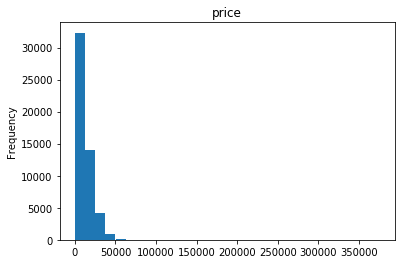

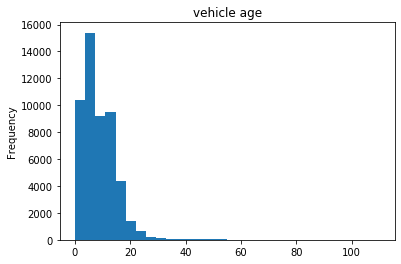

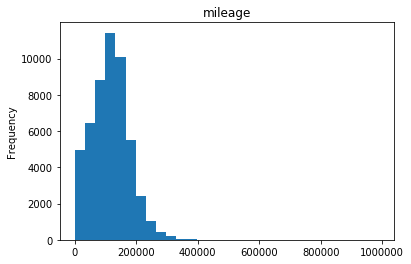

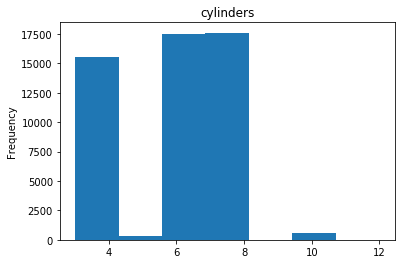

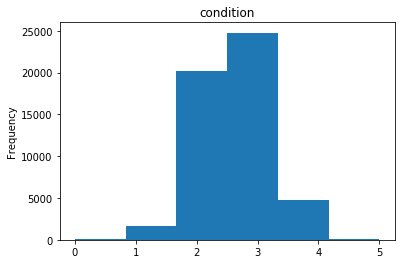

In [86]:
display_histograms(df_hist, quant_bins=30)

Outliers (upper) for quantitative variables make the plot appear even more skewed to the right,  
and prevent from properly scaling and zooming-in on relevant range of values.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"></h2>
    <br/>
<b>Well done!👍:</b> 
        
A big plus for the automation of plot building.

<a class="anchor" id="4_eda-2_box"></a>
### Remove Outliers
[back to EDA](#4_eda)

_Task_: <br />
Determine the upper limits of outliers,  
remove the outliers and store them in a separate DataFrame,  
and continue your work with the filtered data.

In [87]:
def calculate_descriptive_stats(target):
    """
    Returns a Tuple of:
      lower extreme,
      upper extreme,
      IQR
      Q1,
      Q3
    """
    
    q1 = target.quantile(0.25)
    q3 = target.quantile(0.75)
    iqr = q3 - q1
    
    limits = [
        max(q1 - (1.5 * iqr), target.min()),
        min(q3 + (1.5 * iqr), target.max())
    ]
    
    return limits[0], limits[1], iqr, q1, q3

In [88]:
# returns a value for the sake of the exercise, bad practice in general.
# either display a graphic or calculate a value, not both.

def display_boxplot(column, limit_color='red'):
    """
    Displays a boxplot with upper and lower outlier limits highlighted.
    Prints IQR and outlier limits.
    
    Returns calculated outlier limits [lower, upper]
    """
    
    lower_extreme, upper_extreme, iqr, _, _ = calculate_descriptive_stats(column)
    print('iqr:', iqr, 'lower extreme:', lower_extreme, 'upper extreme:', upper_extreme)

    column.plot(kind='box', ylim=(lower_extreme-iqr/1.5, upper_extreme+iqr/1.5))
    plt.hlines([lower_extreme, upper_extreme], color=limit_color, xmin=0.9, xmax=1.1)
    plt.show();
    
    return lower_extreme, upper_extreme

iqr: 11839.0 lower extreme: 1 upper extreme: 34597.5


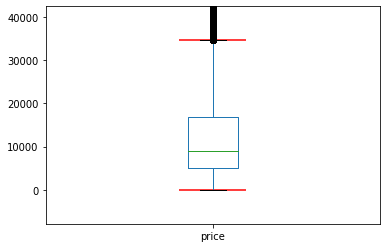

In [89]:
price_lower_limit, price_upper_limit = display_boxplot(df_hist['price'])

iqr: 8.0 lower extreme: 0 upper extreme: 24.0


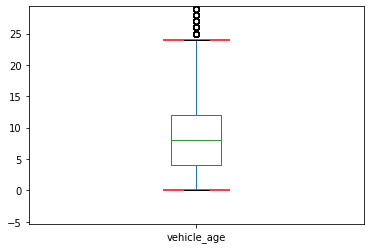

In [90]:
vehicle_lower_limit, vehicle_upper_limit = display_boxplot(df_hist['vehicle_age'])

iqr: 79175.0 lower extreme: 0 upper extreme: 271116.5


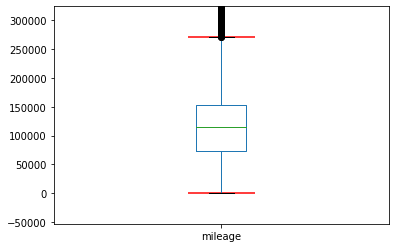

In [91]:
mileage_lower_limit, mileage_upper_limit = display_boxplot(df_hist['mileage'])

iqr: 4.0 lower extreme: 3 upper extreme: 12


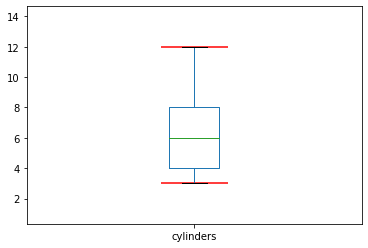

In [92]:
cylinders_lower_limit, cylinders_upper_limit = display_boxplot(df_hist['cylinders'])

iqr: 1.0 lower extreme: 0.5 upper extreme: 4.5


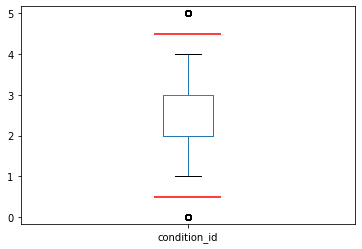

In [93]:
condition_lower_limit, condition_upper_limit = display_boxplot(df_hist['condition_id'])

Only 'cylinders' does not appear to have outliers,  
'condition_id' has 2 outliers,  
and the rest of the columns have many high outliers (right skewed distribution).

In [94]:
df_outliers = df_hist.query('''
    (price < @price_lower_limit or price > @price_upper_limit) \
 or (vehicle_age < @vehicle_lower_limit or vehicle_age > @vehicle_upper_limit) \
 or (mileage < @mileage_lower_limit or mileage > @mileage_upper_limit) \
 or (cylinders < @cylinders_lower_limit or cylinders > @cylinders_upper_limit) \
 or (condition_id < @condition_lower_limit or condition_id > @condition_upper_limit)    
    ''')
display(md(f'outliers make {len(df_outliers)} ({len(df_outliers)/len(df_hist):.2%}) of the dataframe.'))

outliers make 3170 (6.15%) of the dataframe.

In [95]:
df_filtered = df_hist.drop(df_outliers.index)

In [96]:
df_outliers = df_filtered.query('''
    (price < @price_lower_limit or price > @price_upper_limit) \
 or (vehicle_age < @vehicle_lower_limit or vehicle_age > @vehicle_upper_limit) \
 or (mileage < @mileage_lower_limit or mileage > @mileage_upper_limit) \
 or (cylinders < @cylinders_lower_limit or cylinders > @cylinders_upper_limit) \
 or (condition_id < @condition_lower_limit or condition_id > @condition_upper_limit)    
    ''')
display(md(f'Filtered dataframe outliers: {len(df_outliers)} ({len(df_outliers)/len(df_hist):.0%})'))

Filtered dataframe outliers: 0 (0%)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, Daniel,  I see that you used the IQR method for deleting the outliers, you can use this method, it is rather effective one for this task! More details about working with the outliers you can find by links:
    
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    
http://colingorrie.github.io/outlier-detection.html#iqr-method
    
https://statisticsbyjim.com/basics/outliers/

<a class="anchor" id="4_eda-3_comp"></a>
### Compare histograms
[back to EDA](#4_eda)

_Task_: <br />
Use the filtered data to plot new histograms.  
Compare them with the earlier histograms (the ones that included outliers).  
Draw conclusions for each histogram.

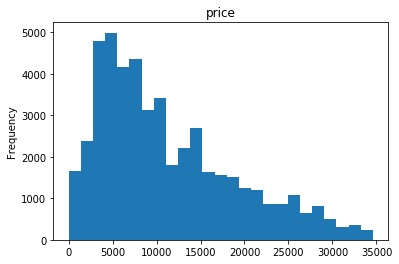

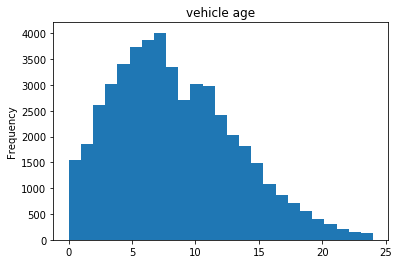

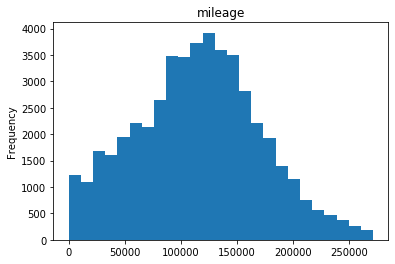

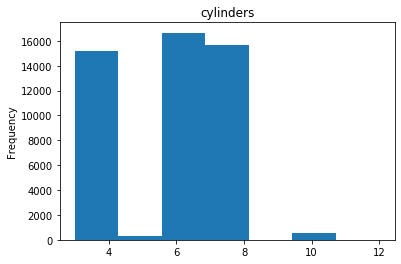

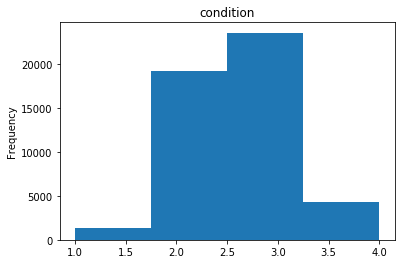

In [97]:
display_histograms(df_filtered, quant_bins=25)

In [98]:
def compare_plots(old, new, kind='hist', xlim=None, title=True, _hook=None, **kwargs):
    """Draws 2 plots: one before removing outliers, and the other afterwards"""
    
    if kind == 'hist':
        _min = min(old.min(), new.min())
        _max = max(old.max(), new.max())
        _range = _min, xlim or _max
        kwargs['range'] = _range
    
    old.plot(kind=kind, **kwargs)
    new.plot(kind=kind, **kwargs)
        
    if _hook and callable(_hook):
        _hook()
    
    if title:
        plt.title(f'{old.name} comparison')
    
    plt.legend(['old', 'new'])
    plt.show();

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
You created really effective function!

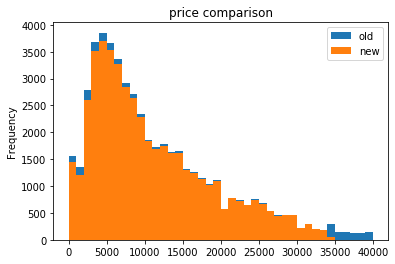

In [99]:
compare_plots(df_hist['price'], df_filtered['price'], bins=40, xlim=40000)

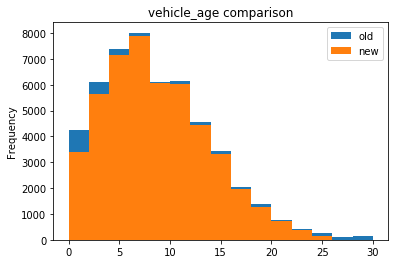

In [100]:
compare_plots(df_hist['vehicle_age'], df_filtered['vehicle_age'], bins=15, xlim=30)

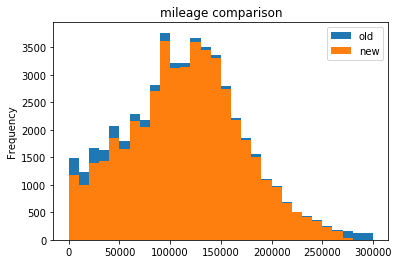

In [101]:
compare_plots(df_hist['mileage'], df_filtered['mileage'], bins=30, xlim=300000)

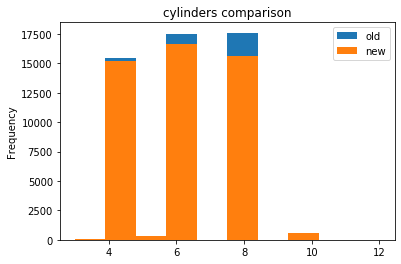

In [102]:
compare_plots(df_hist['cylinders'], df_filtered['cylinders'])

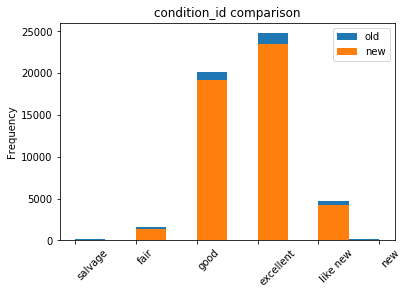

In [103]:
compare_plots(df_hist['condition_id'], df_filtered['condition_id'],
             _hook=lambda:plt.xticks(range(6), labels=condition_ref.values, rotation=45, ha='left'))

The new histograms with no outliers have less values, but the distribution has remained practically the same,  
and it will be easier to work with the data since the scale will not get skewed.

<a class="anchor" id="4_eda-4_ad"></a>
### Ad lifespan
[back to EDA](#4_eda)

_Task_: <br />
Study how many days advertisements were displayed (days_listed).  
Plot a histogram. Calculate the mean and median.  
Describe the typical lifetime of an ad.  
Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [104]:
def plot_stats_hist(series, bins=40, alpha=.5, colors={}, **kwargs):
    """Displays a histogram, with verical lines drawn for important statistics"""
    
    def plot_stat(name, value, color, alpha):
        plt.axvline(value, color=color, label=f'{name} ({value:.1f})', alpha=alpha)
        
    series.hist(bins=bins, alpha=alpha, **kwargs)
    plot_stat('mean', series.mean(), 'green', alpha)
    plot_stat('median', series.median(), 'black', alpha)
    plot_stat('mode', series.mode()[0], 'blue', alpha)

    lower_limit, upper_limit, _, _, _ = calculate_descriptive_stats(ad_ref['days_listed'])
    days_listed_outlier_limits = lower_limit, upper_limit
    for i, limit in enumerate(days_listed_outlier_limits):
        label = f'extremes ({days_listed_outlier_limits[0]:.1f}, {days_listed_outlier_limits[1]:.1f})' \
                if i == 0 else None
        plt.axvline(limit, color='red', label=label, alpha=0.5)
    
    plt.title(f'{series.name} statistics')
    plt.legend()
    plt.ylabel('Frequency')
    plt.show()
    
    outliers_count = len(series.loc[
        (series < days_listed_outlier_limits[0]) \
      | (series > days_listed_outlier_limits[1])])
    
    outliers_percent = outliers_count / len(series)
    
    display(md(f'{series.name} outliers: {outliers_count} ({outliers_percent:.2%})'))

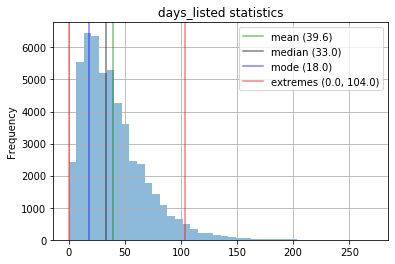

days_listed outliers: 1618 (3.14%)

In [105]:
plot_stats_hist(ad_ref['days_listed'])

Zooming in

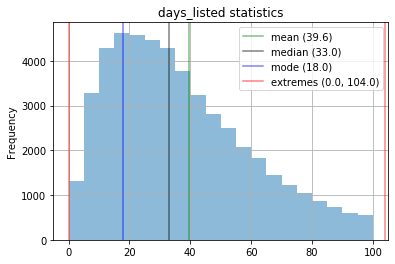

days_listed outliers: 1618 (3.14%)

In [106]:
plot_stats_hist(ad_ref['days_listed'], range=(0,100), bins=20)

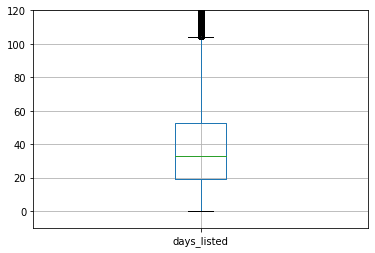

In [107]:
ad_ref['days_listed'].plot(kind='box', ylim=(-10,120), grid=True);

The threshold for abnormally long-listed ads is at 104 (Q3 + 1.5*IQR).  
The bulk part of ads were listed between 20 and 55 days, most frequently ~18 days.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, agree with your interpretation of the analysis' result. The visualization looks great!

<a class="anchor" id="4_eda-5_vehicle"></a>
### Ads by vehicle type
[back to EDA](#4_eda)

_Task_: <br />
Analyze the number of ads and the average price for each type of vehicle.  
Plot a graph showing the dependence of the number of ads on the vehicle type.  
Select the two types with the greatest number of ads.

In [108]:
type_price_pivot = (df
 .pivot_table(
     index='type_id',
     values='price',
     aggfunc=['median', 'count'])
 .reset_index()
)
type_price_pivot.columns = ['type', 'price', 'count']
type_price_pivot['price'] = type_price_pivot['price'].astype('int')
type_price_pivot['type'] = type_price_pivot['type'].apply(lambda x:model_type_ref[x])
# type_price_pivot.set_index('type', inplace=True)
type_price_pivot.sort_values(by='count', inplace=True, ascending=False)
type_price_pivot

,type,price,count
0,SUV,8900,12405
10,truck,14995,12353
9,sedan,5995,12154
8,pickup,14200,6988
3,coupe,12950,2303
12,wagon,7900,1541
5,mini-van,6495,1161
4,hatchback,5980,1047
11,van,7990,633
2,convertible,12250,446


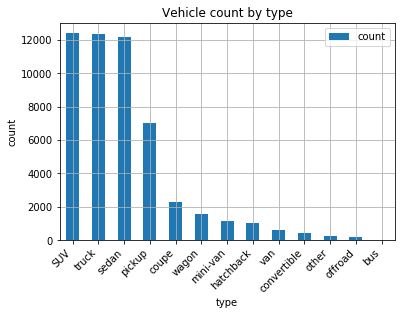

In [109]:
type_price_pivot.plot(kind='bar', x='type', y='count', grid=True, title='Vehicle count by type', ylabel='count')
plt.xticks(rotation=45, ha='right')
plt.show();

In [110]:
display(
    md('These vehicle types have the most ads associated with them:'),
    type_price_pivot[:2])

These vehicle types have the most ads associated with them:

,type,price,count
0,SUV,8900,12405
10,truck,14995,12353


SUV and Truck are the most frequent types of vehicles within ads posted.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

Absolutely true, you correctly chose types of vehicles.

<a class="anchor" id="4_eda-6_price"></a>
### Price correlation
[back to EDA](#4_eda)

_Task_: <br />
What factors impact the price most?  
Take each of the popular types you detected at the previous stage and study whether the price depends on:  
- age
- mileage
- condition
- transmission
- color

For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest.  
When analyzing categorical variables, note that the categories must have at least 50 ads;  
otherwise, their parameters won't be valid for analysis.

In [111]:
correlation_df = df.join(ad_ref)[[
    'price', 'vehicle_age', 'mileage',
    'condition_id', 'transmission_id', 'color_id', 'type_id'
]]
correlation_df['type'] = correlation_df['type_id'].apply(lambda x:model_type_ref[x])
correlation_df.drop('type_id', axis=1, inplace=True)
correlation_df = (correlation_df
                  .query('type == "SUV" or type == "truck"'))

correlation_df.head(2)

,price,vehicle_age,mileage,condition_id,transmission_id,color_id,type
0,9400,7,145000,2,0,10,SUV
7,15990,6,109473,3,0,0,SUV


In [112]:
correlation_df.corr()

,price,vehicle_age,mileage,condition_id,transmission_id,color_id
price,1.000000,-0.521610,-0.449954,0.259821,-0.084861,0.024586
vehicle_age,-0.521610,1.000000,0.558423,-0.333696,0.061650,-0.025910
mileage,-0.449954,0.558423,1.000000,-0.347008,-0.021876,0.005626
condition_id,0.259821,-0.333696,-0.347008,1.000000,-0.013822,-0.003026
transmission_id,-0.084861,0.061650,-0.021876,-0.013822,1.000000,0.001429
color_id,0.024586,-0.025910,0.005626,-0.003026,0.001429,1.000000


There is a moderate negative correlation of -0.52 between a vehicle's age and its price,  
and a less moderate negative correlation of -0.44 between mileage and price.

In [113]:
def scatterplot_by_vehicle_type(df, types, kind,
                                title=None, rotate_xticks=None, xticklabels=None,
                                figsize=(14,4), **kwargs):
    """Plots 2 graphs, side by side"""
    
    colors = list(mcolors.TABLEAU_COLORS)
    fig, axes = plt.subplots(1,2, figsize=figsize)
    # fig.tight_layout(pad=3)
        
    for i, _type in enumerate(types):
        (df
         .query('type == @_type')
         .plot(kind=kind, label=_type, color=colors[i], ax=axes[i], **kwargs))
        
        if isinstance(xticklabels, np.ndarray):
            axes[i].set_xticks(list(range(len(xticklabels))))
            axes[i].set_xticklabels(xticklabels)
            
    if rotate_xticks:
        plt.draw()
        for ax in axes:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks, ha='right')
    
    fig.suptitle(title)
    plt.show()
        
# scatterplot_by_vehicle_type(correlation_df, types=['SUV', 'truck'], kind='scatter', x='vehicle_age', y='price')

In [114]:
def boxplot_by_vehicle_type(df, types, title,
                            x, y, ylim=None, rotate_xticks=None,
                            figsize=(14,4), **kwargs):
    """Plots 2 graphs containing boxplots, side by side"""
    
    colors = list(mcolors.TABLEAU_COLORS)
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    # fig.tight_layout(pad=3)
    
    for i, _type in enumerate(types):
        _df = df.query('type == @_type')
        # print([col for i, col in _df.groupby(x)[y]])
        
        axes[i].boxplot([col for i, col in _df.groupby(x)[y]],
                        medianprops={'color': colors[i]},
                        **kwargs)
        axes[i].set_title(_type)
        axes[i].set_ylabel(y)
        
        if ylim:
            axes[i].set_ylim(*ylim)
            
    plt.suptitle(title)
    
    if rotate_xticks:
        plt.draw()
        for ax in axes:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks, ha='right')
            
    plt.show();
    
# boxplot_by_vehicle_type(correlation_df[['price', 'type', 'transmission_id']],
#            types=['SUV', 'truck'],
#            x='transmission_id', y='price', ylim=(-1_000, 50_000))

__Plotting scatterplots of quantitative variables:__

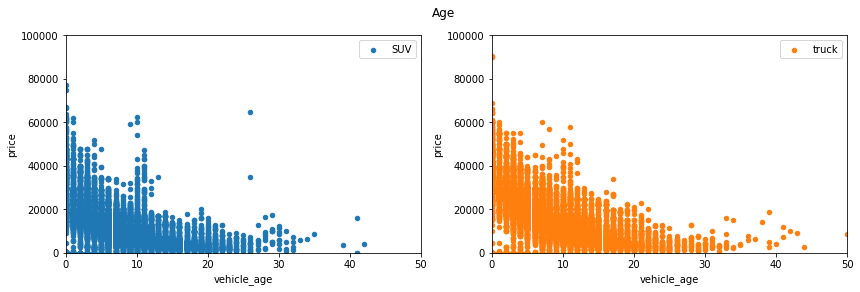

In [115]:
scatterplot_by_vehicle_type(correlation_df,
              types=['SUV', 'truck'],  title='Age', kind='scatter', x='vehicle_age', y='price',
              xlim=(0,50), ylim=(0,100_000))

There is a downwards trend visible, as the vehicle's age increases the price goes does.

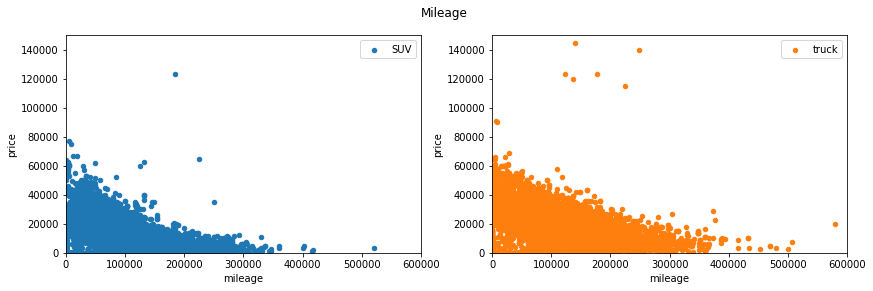

In [116]:
scatterplot_by_vehicle_type(correlation_df,
              types=['SUV', 'truck'], title='Mileage', kind='scatter', x='mileage', y='price',
              xlim=(0,600_000), ylim=(0,150_000))

There is a downwards trend visible, as mileage increases the price goes does.

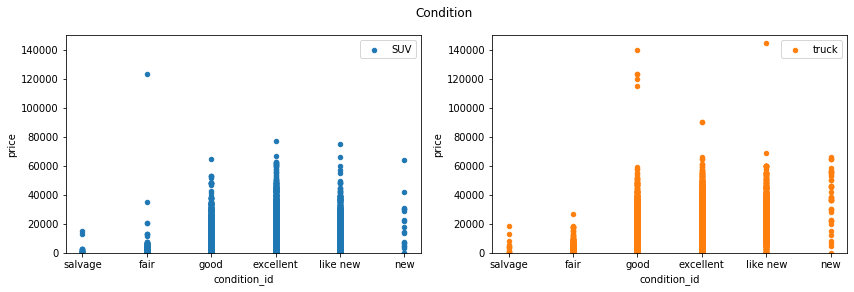

In [117]:
scatterplot_by_vehicle_type(correlation_df,
              types=['SUV', 'truck'], title='Condition', kind='scatter', x='condition_id', y='price', 
              xticklabels=condition_ref.values, ylim=(0,150_000))


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
It seems to me that condition is not quantitative variable, isn't it? Condition is categorical variable, so, it is better to use graphical method (boxplots as you did below or barplots) to analyse the connection between condition and price.

Generally, it seems as if the better the condition, the pricier a vehicle is, both for SUV and Truck (excluding some outliers).  
\* a peculiarity for SUV, 'new' condition prices seem to be lower than 'like new' condition prices, and also there are far fewer samples,  
perhaps not enough to balance it, or older 'new' models (from previous years) are pulling down the price range.

In [118]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)    

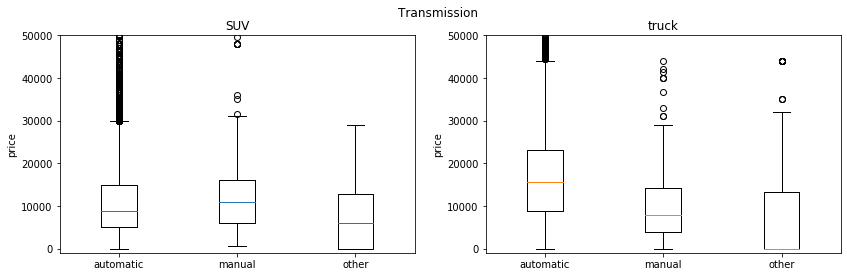

In [119]:
boxplot_by_vehicle_type(correlation_df[['price', 'type', 'transmission_id']],
                        types=['SUV', 'truck'], title='Transmission',
                        x='transmission_id', y='price', ylim=(-1_000, 50_000),
                        labels=transmission_ref.values)

SUV by transmission prices are more or less of the same range,  
while for Trucks, 'automatic' transmission is generally higher priced, and have a broader price range.

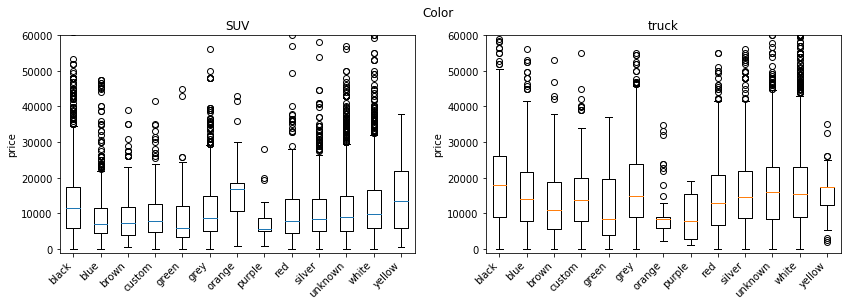

In [120]:
boxplot_by_vehicle_type(correlation_df[['price', 'type', 'color_id']],
                        types=['SUV', 'truck'], title='Color',
                        x='color_id', y='price', ylim=(-1_000, 60_000),
                        rotate_xticks=45,
                        labels=color_ref.values)

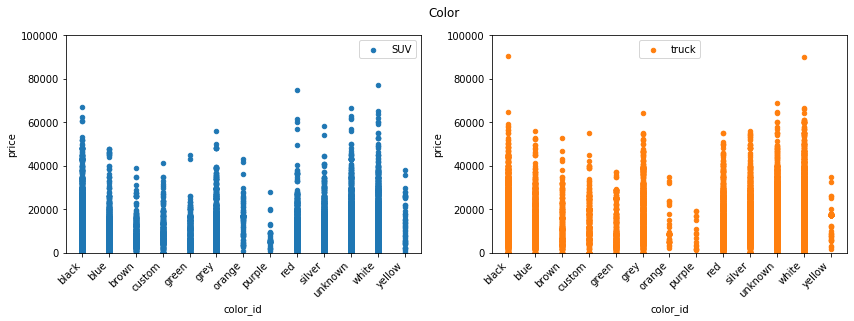

In [121]:
scatterplot_by_vehicle_type(correlation_df,
              types=['SUV', 'truck'], title='Color', kind='scatter', x='color_id', y='price', 
                            ylim=(0, 100_000), xticklabels=color_ref.values, rotate_xticks=45)

There is no clear correlation of color and price, but there are colors that have more occurences than others.

In [122]:
correlation_df.corr()['price']

price              1.000000
vehicle_age       -0.521610
mileage           -0.449954
condition_id       0.259821
transmission_id   -0.084861
color_id           0.024586
Name: price, dtype: float64

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

At this step again you did a great job, great and highly informative visualization and correct logic of the analysis of course!

<a class="anchor" id="5_conclusions"></a>
## Overall conclusion
***
[back to Table of Contents](#0_toc)

_Technical_: <br />
* Data had missing values and incorect data types, which were fixed and filled.  
* 'color' column is not dependant on other columns and could not be meaningfully filled,  
  so for the sake of functionality it was filled with a generic keyword 'unknown'.
* 'is_4wd' has only 1s and NaNs, should probably have been 0s.  
  a Bug Report should be filled.
* Categories were exported to lookup dataframes.
* 'vehicle' and 'ad' data were separated to different dataframes.


_Business_: <br />
The typical lifetime of an ad is 18 days, and generally within a range of 20-55 days.  
SUVs, Trucks, Sedans and Pickups are the most featured vehicle types,  
Trucks and Pickups being the most expensive and SUVs and Sedans the least.

By investigating a sample of 2 of the most popular types of vehicles from posted ads: SUVs and Trucks,  
the following is apparent:
* Vehicle's Age - a right-skewed distribution, the higher the age the lower the price, moderate negative correlation (-0.52)
* Mileage - a right skewed distribution, the higher the mileage the lower the price, moderate negative correlation (-0.45)
* Condition - the better the condition, generally the higher the price - weak positive correlation (0.26)
* Transmission - no correlation found.
* Color - no clear correlation, and different from type to type.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

So comprehensive final conclusion, I can see your analytical approach!

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Daniel, thank you for submitting your project! I can see that you've worked really hard on it! You did a great job to bring the project to completion, thanks for your patience and desire to complete the project! I am impressed with the quality of your project,  so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    


**Good things and practices in your project I want to highlight🙂**:
* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You add commentaries and explanations to your actions!
* You used visualization a lot and formatted it correctly, good job!
* You wrote your own functions to complete the tasks, it is a good practice of programming skills!
* You project is well formatted and logically organized, it was a pleasure for me to review your project!

 
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/zyjCXPXNo39i0CB467/giphy.gif)

# Project completion checklist
***

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn